In [40]:
from functools import wraps # This convenience func preserves name and docstring
import matplotlib
import matplotlib.pyplot as plt

def _add_method(cls):
    def decorator(func):
        @wraps(func) 
        def wrapper(self, *args, **kwargs): 
            return func(*args, **kwargs)
        setattr(cls, func.__name__, wrapper)
        # Note we are not binding func, but wrapper which accepts self but does exactly the same as func
        return func # returning func means func can still be used normally
    return decorator


# override __add__ method in Figure object
@_add_method(matplotlib.figure.Figure)
def __add__(self, other):
    # load ax from first fig
    ax_list_1 = self.axes

    # load ax from second fig
    ax_list_2 = other.axes

    ax_list = ax_list_1 + ax_list_2
    n = len(ax_list)

    fig, ax = plt.subplots(1,n) 

    # create new figure with subplots
    for i, ax_i in enumerate(ax_list):
#         ax[i] = ax_i
        ax[i].update_from(ax_i)
        print(ax[i])

    # return figure
    return fig, ax

# @_add_method(matplotlib.figure.Figure)
# def __radd__(self):
# #     return self.__add__(other)
#     return None

In [53]:
from functools import wraps # This convenience func preserves name and docstring
import matplotlib
import matplotlib.pyplot as plt
import pickle
import io

def _add_method(cls):
    def decorator(func):
        @wraps(func) 
        def wrapper(self, *args, **kwargs): 
            return func(*args, **kwargs)
        setattr(cls, func.__name__, wrapper)
        # Note we are not binding func, but wrapper which accepts self but does exactly the same as func
        return func # returning func means func can still be used normally
    return decorator


# override __add__ method in Figure object
@_add_method(matplotlib.figure.Figure)
def __add__(self, other):
    # load ax from first fig
    ax_list_1 = self.axes

    # load ax from second fig
    ax_list_2 = other.axes

    ax_list = ax_list_1 + ax_list_2
    n = len(ax_list)

    fig, ax = plt.subplots(1,n) 

    # create new figure with subplots
    for i, ax_i in enumerate(ax_list):
        buf = io.BytesIO()
        pickle.dump(ax_i, buf)
        buf.seek(0)
        ax_p = pickle.load(buf) 
        ax[i] = ax_p
        print(ax_p)

    # return figure
    return fig, ax

# @_add_method(matplotlib.figure.Figure)
# def __radd__(self):
# #     return self.__add__(other)
#     return None

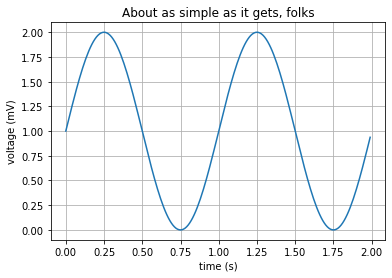

In [67]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig1, ax1 = plt.subplots()
ax1.plot(t, s)

ax1.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax1.grid()

plt.show()

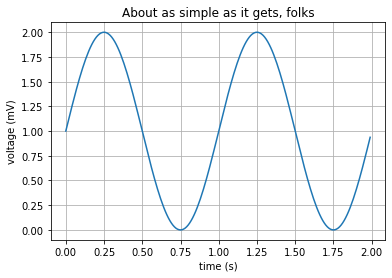

In [68]:
fig2, ax2 = plt.subplots()
ax2.plot(t, s)

ax2.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax2.grid()

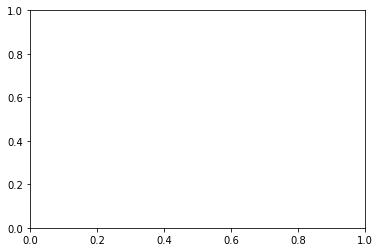

In [72]:
fig3, ax3 = plt.subplots()

ax3 = fig2.axes.copy()

In [79]:
def make_manager(fig):
    # create a dummy figure and use its
    # manager to display "fig"  ; based on https://stackoverflow.com/a/54579616/8508004
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)

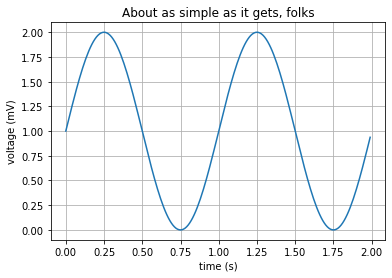

In [87]:
# fig3, ax3 = plt.subplots()

# buf = io.BytesIO()
# pickle.dump(fig1, buf)
# buf.seek(0)
# fig3 = pickle.load(buf)
# plt.show()

with open('plots.obj', 'wb') as file:
    pickle.dump(fig1, file)

# plt.show()
# plt.close(fig)

#simulation of new scope
with open('plots.obj', 'rb') as file:
    fig3 = pickle.load(file)

# figure is now available as fig2
# fig3.show()
# # plt.show()

ma
ke_manager(fig3)
# fig3.show()

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


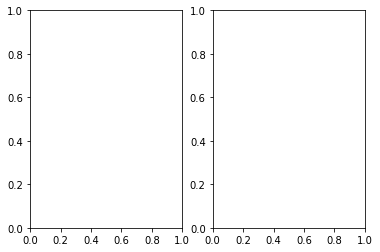

In [56]:
fig, ax = fig1.__add__(fig1, fig2)

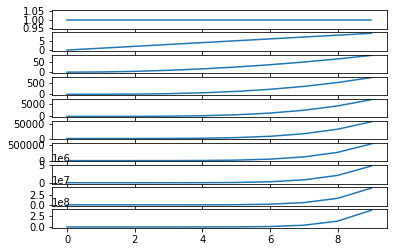

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import io

num_rows = 10
num_cols = 1
fig, axs = plt.subplots(num_rows, num_cols, sharex=True)
for i in range(num_rows):
     ax = axs[i]
     ax.plot(np.arange(10), np.arange(10)**i)

def on_click(event):

    if not event.inaxes: return
    inx = list(fig.axes).index(event.inaxes)
    buf = io.BytesIO()
    pickle.dump(fig, buf)
    buf.seek(0)
    fig2 = pickle.load(buf) 

    for i, ax in enumerate(fig2.axes):
        if i != inx:
            fig2.delaxes(ax)
        else:
            axes=ax

    axes.change_geometry(1,1,1)
    fig2.show()

fig.canvas.mpl_connect('button_press_event', on_click)

plt.show()

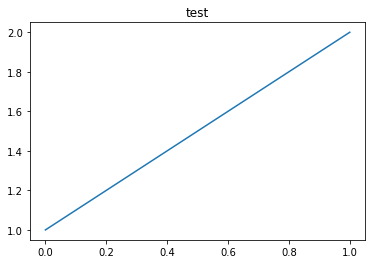

In [89]:
import io
from PIL import Image

plt.figure()
plt.plot([1, 2])
plt.title("test")
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
im = Image.open(buf)
im.show()
buf.close()